In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
pd.options.display.max_columns=999


In [2]:
bike=pd.read_csv("E:\\csv files\\hour.csv")

In [3]:
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
bike.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
bike.shape

(17379, 17)

In [7]:
bike.isnull().any()

instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

In [8]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
bike.apply(lambda x:len(x.unique()))

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [10]:
bike=bike.rename(columns={"weathersit":"weather","yr":"year","mnth":"month","hr":"hour","cnt":"count"})

In [11]:
bike=bike.drop(columns=["instant","dteday","year"])

In [12]:
cols=["season","hour","month","holiday","weekday","workingday","weather"]
for col in cols:
    bike[col]=bike[col].astype("category")
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   month       17379 non-null  category
 2   hour        17379 non-null  category
 3   holiday     17379 non-null  category
 4   weekday     17379 non-null  category
 5   workingday  17379 non-null  category
 6   weather     17379 non-null  category
 7   temp        17379 non-null  float64 
 8   atemp       17379 non-null  float64 
 9   hum         17379 non-null  float64 
 10  windspeed   17379 non-null  float64 
 11  casual      17379 non-null  int64   
 12  registered  17379 non-null  int64   
 13  count       17379 non-null  int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 1.0 MB


[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

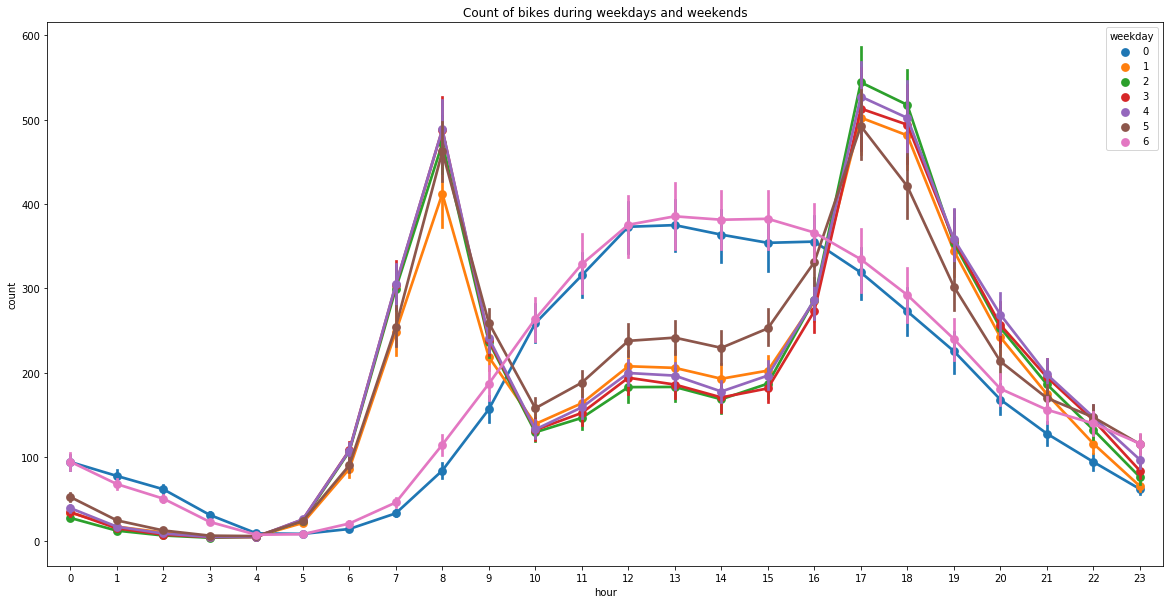

In [13]:
fig,ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=bike,x="hour",y="count",hue="weekday",ax=ax)
ax.set(title="Count of bikes during weekdays and weekends")


[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends of unregistred users')]

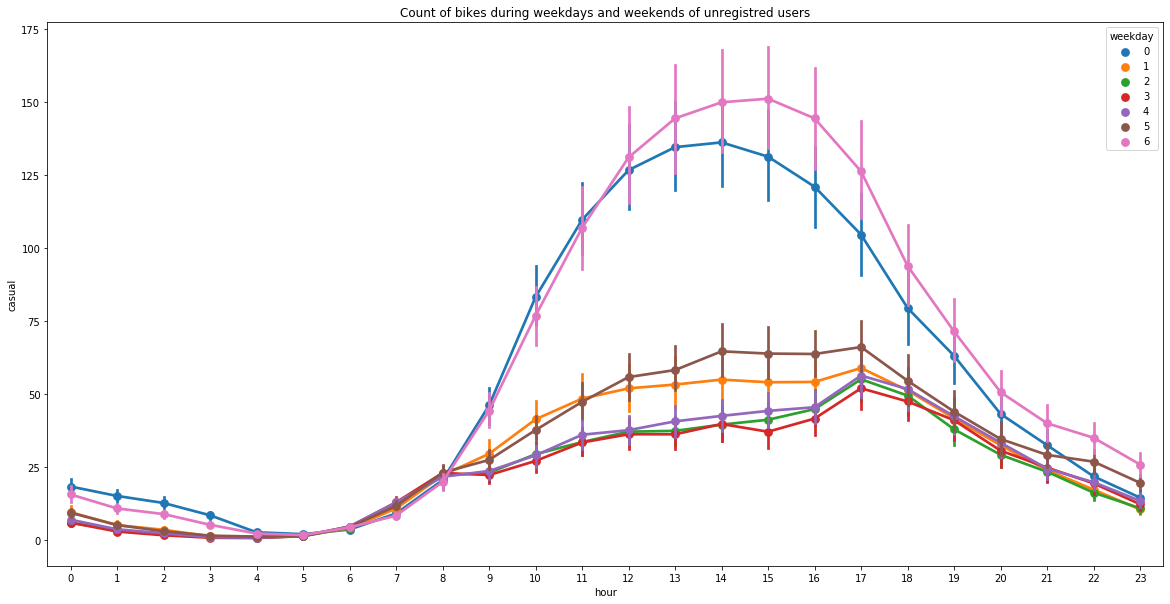

In [14]:
fig,ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=bike,x="hour",y="casual",hue="weekday",ax=ax)
ax.set(title="Count of bikes during weekdays and weekends of unregistred users")


[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends of registred users')]

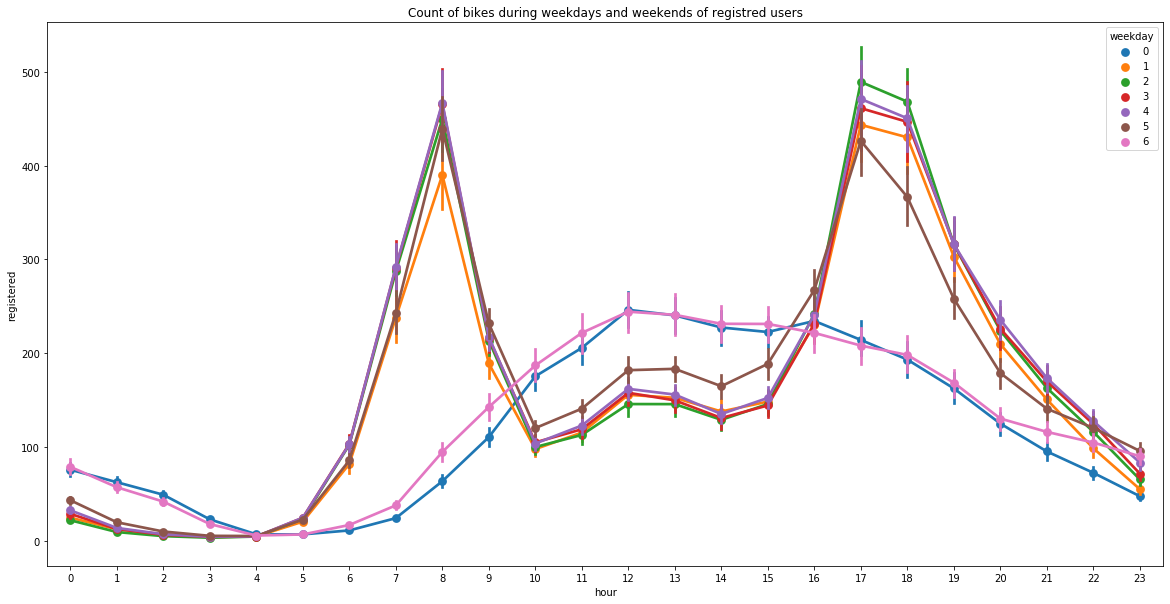

In [15]:
fig,ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=bike,x="hour",y="registered",hue="weekday",ax=ax)
ax.set(title="Count of bikes during weekdays and weekends of registred users")

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

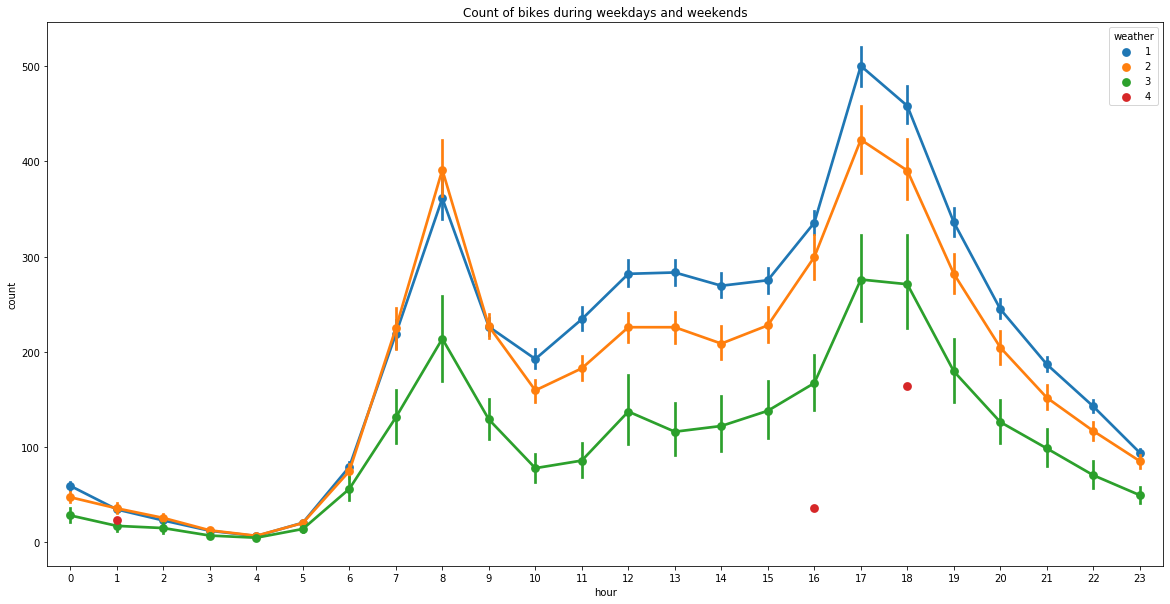

In [16]:
fig,ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=bike,x="hour",y="count",hue="weather",ax=ax)
ax.set(title="Count of bikes during weekdays and weekends")


[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends of unregistred users')]

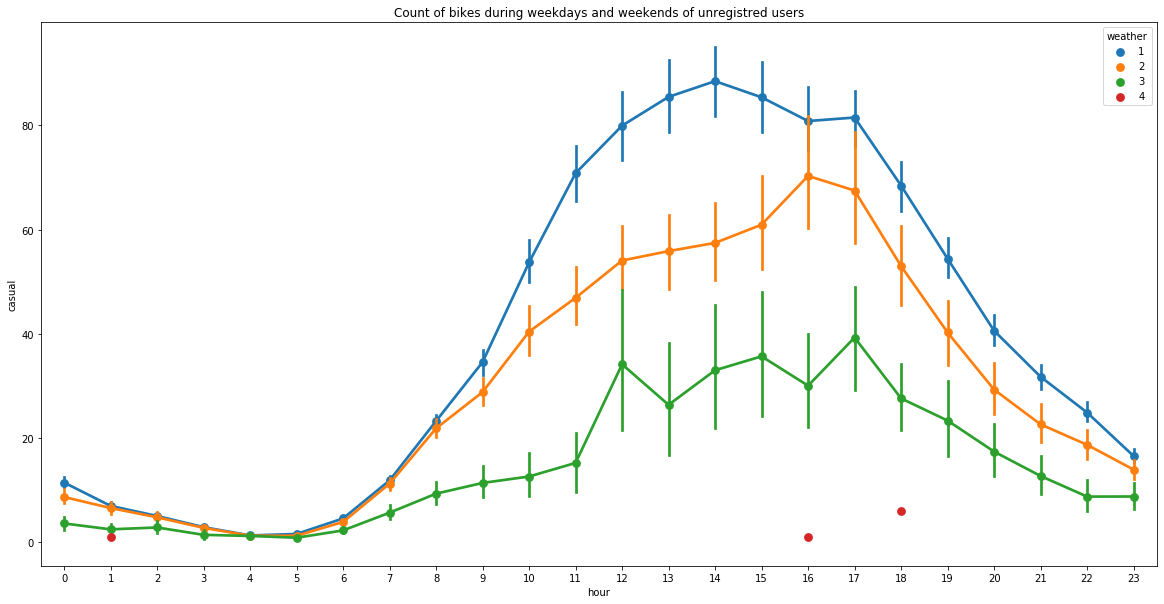

In [17]:
fig,ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=bike,x="hour",y="casual",hue="weather",ax=ax)
ax.set(title="Count of bikes during weekdays and weekends of unregistred users")

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends of registred users')]

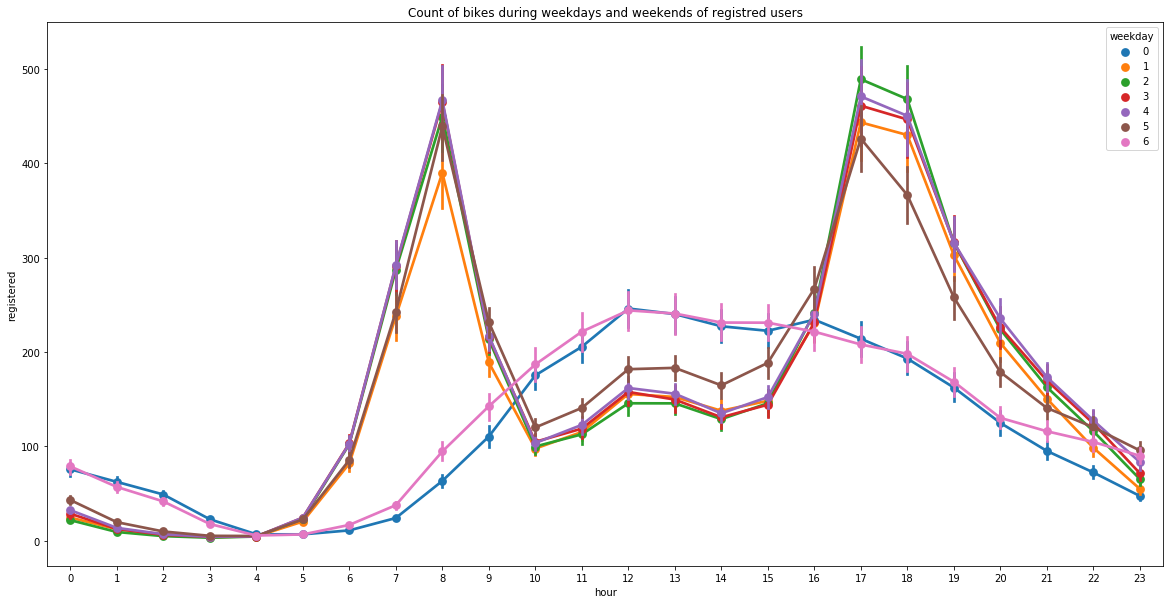

In [18]:
fig,ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=bike,x="hour",y="registered",hue="weekday",ax=ax)
ax.set(title="Count of bikes during weekdays and weekends of registred users")

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

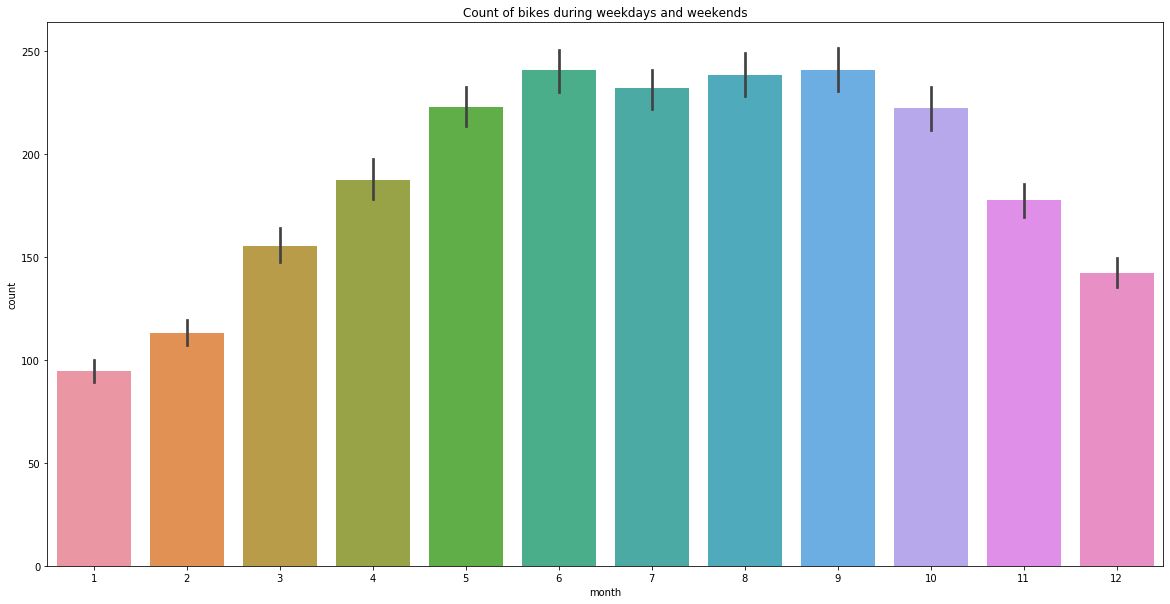

In [19]:
fig,ax=plt.subplots(figsize=(20,10))
sns.barplot(data=bike,x="month",y="count",ax=ax)
ax.set(title="Count of bikes during weekdays and weekends")

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

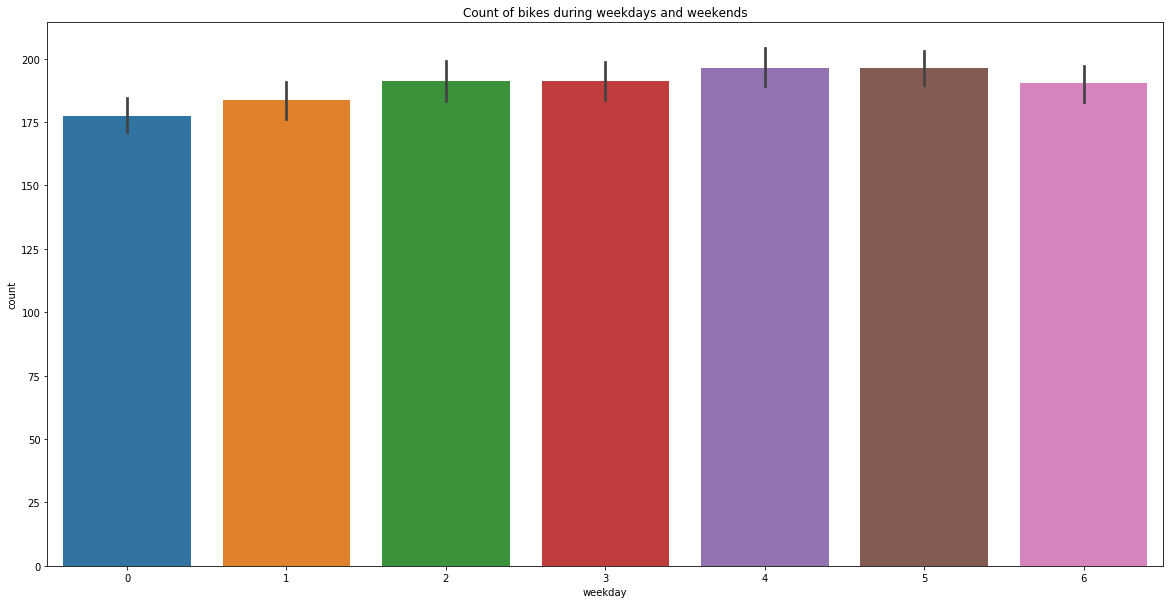

In [20]:
fig,ax=plt.subplots(figsize=(20,10))
sns.barplot(data=bike,x="weekday",y="count",ax=ax)
ax.set(title="Count of bikes during weekdays and weekends")

[Text(0.5, 1.0, 'Relation between humidity and bikeusers')]

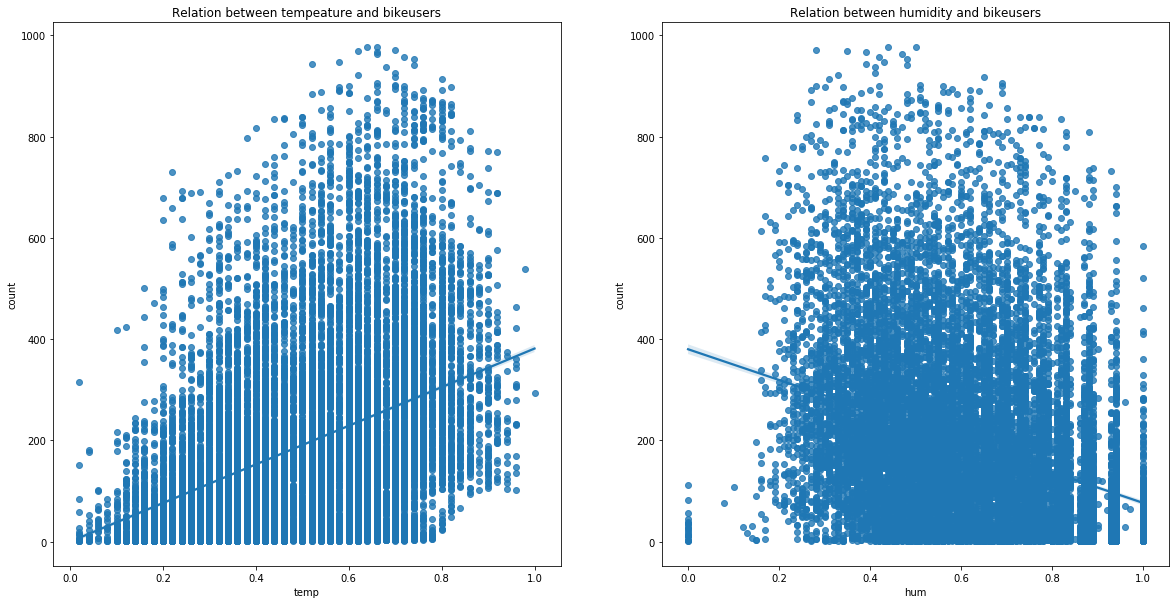

In [21]:
fiq,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,10))
sns.regplot(x=bike["temp"],y=bike["count"],ax=ax1)
ax1.set(title='Relation between tempeature and bikeusers')
sns.regplot(x=bike["hum"],y=bike["count"],ax=ax2)
ax2.set(title="Relation between humidity and bikeusers")

[Text(0.5, 1.0, 'Theortical quantites')]

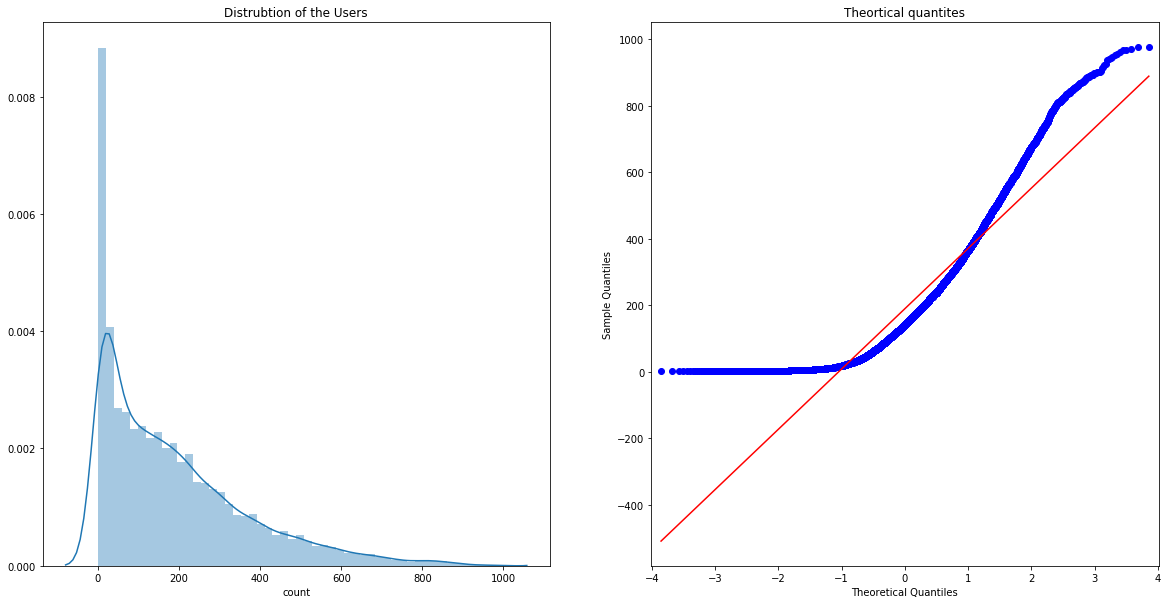

In [22]:
from statsmodels.graphics.gofplots import qqplot
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,10))
sns.distplot(bike["count"],ax=ax1)
ax1.set(title="Distrubtion of the Users")
qqplot(bike["count"],ax=ax2,line="s")
ax2.set(title="Theortical quantites")

In [23]:
bike["count"]=np.log(bike["count"])

[Text(0.5, 1.0, 'Theortical quantites')]

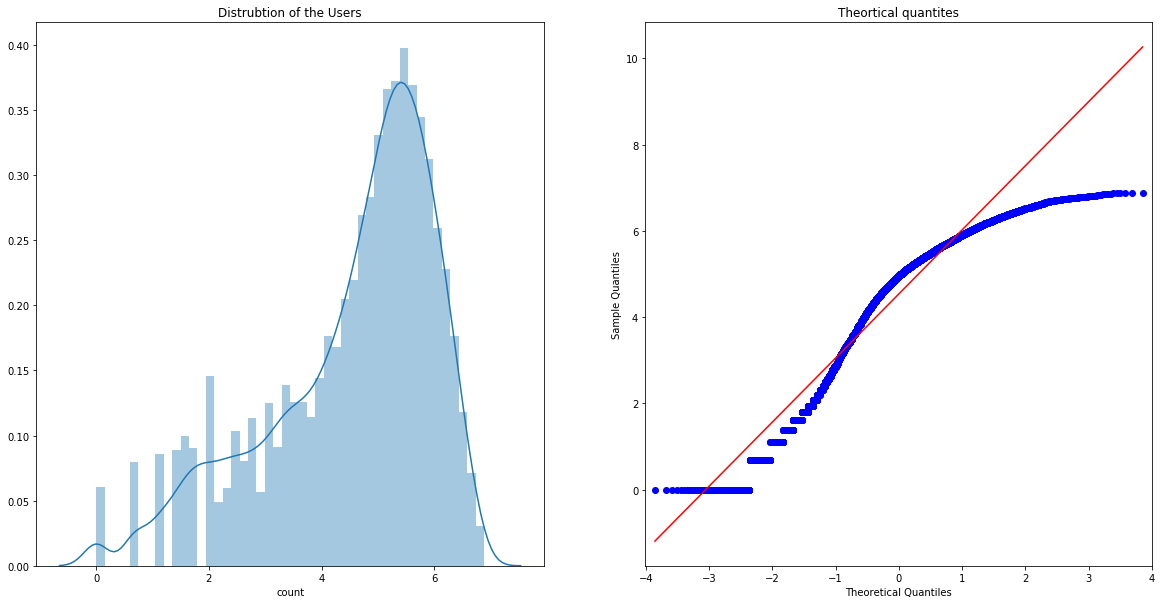

In [24]:
from statsmodels.graphics.gofplots import qqplot
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,10))
sns.distplot(bike["count"],ax=ax1)
ax1.set(title="Distrubtion of the Users")
qqplot(bike["count"],ax=ax2,line="s")
ax2.set(title="Theortical quantites")

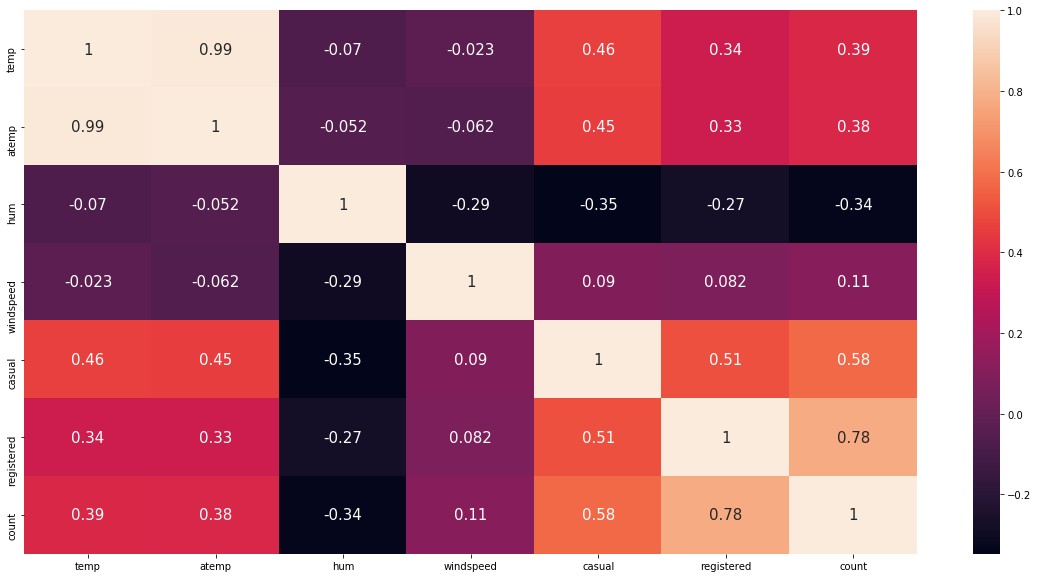

In [25]:
corr=bike.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,annot_kws={"size":15})

In [26]:
bike.head()

,season,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,2.772589
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,3.688879
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,3.465736
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,2.564949
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,0.000000


#one hot encoding

In [28]:
pd.get_dummies(bike["season"],prefix="season",drop_first=True)   #prefix will give the name,drop_first will not show the first column but it is there as these 

,season_2,season_3,season_4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
17374,0,0,0
17375,0,0,0
17376,0,0,0
17377,0,0,0


In [34]:
bike_encoding=bike
def one_hot_encoding(data,column):
    
    data=pd.concat([data,pd.get_dummies(data[column],prefix=column,drop_first=True)],axis=1)
    data=data.drop([column],axis=1)
    return data
        

In [35]:
cols=["season","hour","month","holiday","weekday","workingday","weather"]
for col in cols:
    bike_encoding=one_hot_encoding(bike_encoding,col)
bike_encoding.head()

,temp,atemp,hum,windspeed,casual,registered,count,season_2,season_3,season_4,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3,weather_4
0,0.24,0.2879,0.81,0.0,3,13,2.772589,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.22,0.2727,0.80,0.0,8,32,3.688879,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.22,0.2727,0.80,0.0,5,27,3.465736,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0.24,0.2879,0.75,0.0,3,10,2.564949,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0.24,0.2879,0.75,0.0,0,1,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [38]:
x=bike_encoding.drop(columns=["atemp","windspeed","casual","registered","count"],axis=1)
y=bike_encoding["count"]

In [40]:
from sklearn.linear_model import LinearRegression,Ridge,HuberRegressor,ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor

In [41]:
models=[LinearRegression(),Ridge(),HuberRegressor(),ElasticNetCV(),DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),ExtraTreesRegressor()]

In [44]:
from sklearn import model_selection
def train(model):
    kfold=model_selection.KFold(n_splits=5,random_state=42)
    pred=model_selection.cross_val_score(model,x,y,cv=kfold,scoring="neg_mean_squared_error")
    cv_score=pred.mean()
    print("MOdel:",model)
    print("CvScore:",abs(cv_score))

In [45]:
for model in models:
    train(model)

MOdel: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
CvScore: 0.6569114446643042
MOdel: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
CvScore: 0.6304079414191446
MOdel: HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)
CvScore: 0.660330693386714
MOdel: ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)
CvScore: 0.6252227080480569
MOdel: DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [50]:
model=RandomForestRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [51]:
error=y_test-y_pred

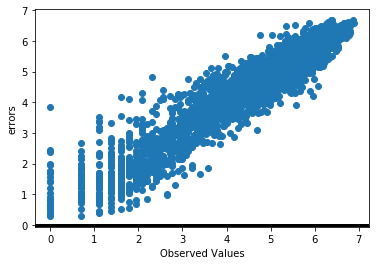

In [54]:
fig,ax=plt.subplots()
ax.scatter(y_test,y_pred)
ax.axhline(lw=3,color="black")
ax.set_xlabel("Observed Values")
ax.set_ylabel("errors")
plt.show()

In [56]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))

0.48391885079228575